Bu yerdagi formulalarni o'zbekchada boshqa nomlarda bilishiz mumkin, lekin kelajakda qulay bo'lishi uchun ularni ingliz tilida bilganiz ma'qulroq.

<h3>1. Mean va Expected qiymat.</h3>

Mean qiymat bu arifmetik o'rtacha qiymat :
$$
V_{mean}= \frac{1}{N} \sum _{n=1}^{N}V_{n}= \frac{1}{5} \left( 10+5+10+10+10 \right) = 9 
$$
Expected qiymat bu ham arifmetik o'ratacha qiymat, ammo o'ratacha qiymati hisoblanayotgan obekt 1 ta, yani agar sizda xatolik bilan ko'rsatadigan tarozi bo'lsa va siz o'z vazningizni aniqroq o'lchamoqchi bo'lsangiz, unda bir necha marta o'lchab ularni o'rtachasini olishingiz kifoya.

Mean <b> μ </b> bilan, Expected esa <b>E</b> bilan belgilanadi.


<h3>2. Variance va Standard deviation.</h3>
Variance bu datasetining o'z mean qiymatidan qanchalik yoyilganligi, Standard deviation esa variance ning ildizga olingani. Standard deviation σ (sigma) bilan, Variance $\sigma ^{2}$ bilan ifodalanadi. 

Bizga 2 sinfdagi o'quvchilarning baxolari berilgan bo'lsin

In [2]:
import numpy as np
from scipy.stats import norm
import pandas as pd
n_students = 1000
n_classes = 2
header = []
for i in range(n_students):
    header.append('S' + str(i))
grades = np.random.binomial(n=10, p=0.7, size=(n_classes,n_students))
class_info = []
for i in range(n_classes):
    class_info.append("class" + str(i))
data = pd.DataFrame(grades, columns = header, index=class_info)
print(data)

        S0  S1  S2  S3  S4  S5  S6  S7  S8  S9  ...  S990  S991  S992  S993  \
class0   4   8   8   4   6   6   9   9   7   4  ...     5     7    10     7   
class1   8   6   7   8   8   6   7   6   6   8  ...     6     7     9     9   

        S994  S995  S996  S997  S998  S999  
class0     6     8    10     6     8     7  
class1     9     6     8     8     9     8  

[2 rows x 1000 columns]


Kelinglar endi ularni mean valuesini hisoblaymiz:

In [4]:
means = np.round(np.mean(data.get_values(), 1),2)
print(means)

[7.04 6.98]


Birinchi mean bu birinchi sinfga tegishli, 2- mean 2-sinfga tegishli. Endi biz har bir baxolarning (qiymatlarning) mean qiymat bilan ayrilganini topib chiqamiz, bu odatda <b>distance</b> deb ataladi: $ x_{n}-  \mu $

In [5]:
data_1 = pd.DataFrame((data._values.T - means).T, columns = header, index=class_info)
print(data_1)

          S0    S1    S2    S3    S4    S5    S6    S7    S8    S9  ...  S990  \
class0 -3.04  0.96  0.96 -3.04 -1.04 -1.04  1.96  1.96 -0.04 -3.04  ... -2.04   
class1  1.02 -0.98  0.02  1.02  1.02 -0.98  0.02 -0.98 -0.98  1.02  ... -0.98   

        S991  S992  S993  S994  S995  S996  S997  S998  S999  
class0 -0.04  2.96 -0.04 -1.04  0.96  2.96 -1.04  0.96 -0.04  
class1  0.02  2.02  2.02  2.02 -0.98  1.02  1.02  2.02  1.02  

[2 rows x 1000 columns]


In [6]:
data_2 = pd.DataFrame(np.square(data_1._values), columns = header, index=class_info)
print(data_2)

            S0      S1      S2      S3      S4      S5      S6      S7  \
class0  9.2416  0.9216  0.9216  9.2416  1.0816  1.0816  3.8416  3.8416   
class1  1.0404  0.9604  0.0004  1.0404  1.0404  0.9604  0.0004  0.9604   

            S8      S9  ...    S990    S991    S992    S993    S994    S995  \
class0  0.0016  9.2416  ...  4.1616  0.0016  8.7616  0.0016  1.0816  0.9216   
class1  0.9604  1.0404  ...  0.9604  0.0004  4.0804  4.0804  4.0804  0.9604   

          S996    S997    S998    S999  
class0  8.7616  1.0816  0.9216  0.0016  
class1  1.0404  1.0404  4.0804  1.0404  

[2 rows x 1000 columns]


Datasetning variance ni topish uchun, biz hamma kvadratga oshirilgan distance larning o'rtacha qiymatini olishimiz kerak.
$$
\sigma ^{2}= \frac{1}{N} \sum _{n=1}^{N} \left( x_{n}-  \mu  \right) ^{2}
$$

#class0 uchun variance quyidagicha bo`ladi:
print(np.sum(data_2._values[0, :])/ n_students)
#class1 uchun variance quyidagicha bo`ladi:
print(np.sum(data_2._values[1, :])/ n_students)

Shunda bizning standard deviationimiz quyidagicha bo`ladi:
$$
\sigma =\sqrt[]{\frac{1}{N} \sum _{n=1}^{N} \left( x_{n}-  \mu  \right) ^{2}}
$$

In [10]:
#class0 uchun std quyidagicha bo`ladi:
print(np.sqrt(np.sum(data_2._values[0, :])/ n_students))
#class1 uchun std quyidagicha bo`ladi:
print(np.sqrt(np.sum(data_2._values[1, :])/ n_students))

1.4068262152803381
1.4250614021858847


Amaliyotda variance ning formulasi biroz boshqacha:
$$
\sigma ^{2}= \frac{1}{N-1} \sum _{n=1}^{N} \left( x_{n}-  \mu  \right) ^{2}
$$


<h3>3. NORMAL DISTRIBUTION.</h3>

Real xayotdagi ko'pgina random qiymatlar nomal distribution ga bo'ysunadi.

<b>
Normal distributionning asosiy manosi, har qanday random to'plamda o'rtacha qiymat bo'ladi va to'plamdagi elementlarning eng katta qismi unga yaqin yoki teng sonlar bo'ladi, va bu variancega bog`liq.
</b>

Yuqoridagi o'quvchilar datasetining histogramini plot qilamiz:

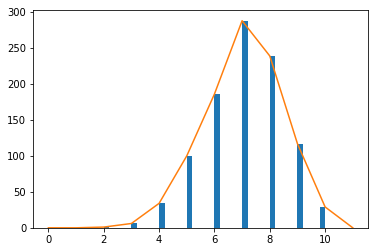

In [27]:
import matplotlib.pyplot as plt
count, division = np.histogram(data.iloc[0]._values, bins=list(range(13)))
plt.hist(data.iloc[0], bins=40)
plt.plot(division[:12] ,count, 60)
plt.show()


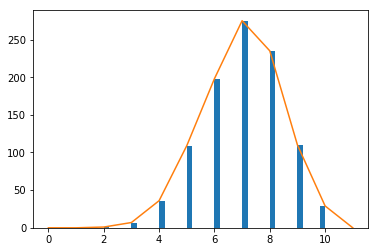

In [28]:
count, division = np.histogram(data.iloc[1]._values, bins=list(range(13)))
plt.hist(data.iloc[1], bins=40)
plt.plot(division[:12] ,count, 12)
plt.show()

Ko'rib turganizdek grafik o'zining eng katta qiymati atrofida deyarli simmetrik.

In [17]:
count

array([  0,   0,   1,   7,  36, 109, 198, 275, 235, 110,  29,   0])

In [18]:
print((count[6] + count[7] + count[8])/ n_students);

0.708


In [19]:
(count[9] + count[10])/ n_students

0.139

In [20]:
(np.sum(count[0:6]))/ n_students

0.153

In [21]:
print(means[1])

6.98


Yuqoridagi studentlarning baxo datasidan foydalanib har bir o'quvchining malum bir baxo olishi extimolini topishimiz kerak bo'lsin. Unda bizga Normal distribution yordamga keladi.
Normal distribution, va yana Gaussian deb ataluvchi formula quyidagicha :

$$\
f\left(x; \mu , \sigma ^{2} \right) = \frac{1}{\sqrt[]{2 \pi  \sigma ^{2}}}e^{\frac{- \left( x- \mu  \right) ^{2}}{2 \sigma ^{2}}}
$$


Agar biz uni chizsak, Gaussian curve hosil bo'ladi va u bazan Probability Density Function (PDF) deb ham ataladi. 

<b>Normal distributionning asosiy qoidalaridan yana biri ushbu graphning o'lchami(yuzasi) har doim 1ga teng bo`ladi.</b>

In [22]:
std = np.std(data.iloc[1])
mean = np.mean(data.iloc[1])
print(std, mean)
# here we find probability for each score (actually is 0-10 but we are expanding 
# it to just make it more handsome)
n_dist = (1./(std * np.sqrt(2 * np.pi))) * np.exp(-np.square(np.arange(mean-10,mean+10) - mean)/ (2*std * std))


1.4250526306070244 6.985


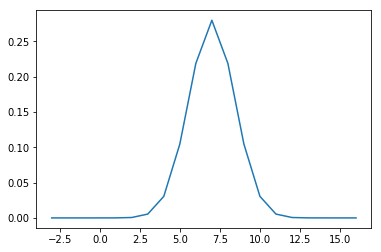

In [23]:
plt.plot(np.arange(mean-10,mean+10), n_dist)
plt.show()

In [24]:
# now lets get the probs of scores 6 7 8,
np.sum((1./(std * np.sqrt(2 * np.pi))) * np.exp(-np.square(np.array([6,7,8]) - mean)/ (2*std * std)))

0.7176257227986953

Normal distribution formulasining kelib chiqishi haqida quyidagi videoda malumot topishiz mumkin:

[*] https://www.youtube.com/watch?v=cTyPuZ9-JZ0


<h3>4. ESTIMATE, ACCURACY AND PRECISION </h3>
<b>Estimate </b>
Estimate, bu sistemaning yashirin qismini hisoblashdir, masalan robotning joylashuvi odatda bizga nomalum bo'ladi biz uni gps orqali bilib olamiz. Estimate ni bir necha sensorlar ishlatib, yoki tracking algoritmlarini ishlatib aniqligini oshirsa bo'ladi.

<b> Accuracy </b>
Accuracy, estimatening haqiqiy qiymatga qanchalik yaqinligini ko'rstadi.

<b> Precision </b>
Precision bu estimationlarning bir biriga qanchalik darajada yaqinligi, ular haqiqiy qiymatga yaqin bo'lmasligi ham mumkin.

Shunday qilib, o'rtacha qiymat va haqiqiy qiymat o'rtasidagi masofa measurement accuracy deb ataladi (qanchalik kichik bo'lsa accuracy shunchalik yuqori). Distributionning asoisy qismi joylashgan grafik kengligi, (yuqoridagi funksiyadagi 6,7,8 joylashgan joylar) precision yoki measurement noise deb ataladi.
